In [12]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from NEF_syn import *
from NEF_rec import *

palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

# Debug

In [3]:
dataset = "jiang"
sid = 1
alpha = 0.2
z = 1
lambd = 0
n_neurons = 500
iti = False
iti_noise = 0
empirical = pd.read_pickle(f"data/{dataset}.pkl").query("sid==@sid")
trials = empirical['trial'].unique() 
columns = ['type', 'sid', 'trial', 'stage', 'estimate']
dfs = []
W = np.zeros((1, n_neurons))
for trial in trials[:2]:
    print(f"training sid {sid}, trial {trial}")
    env = EnvironmentRec(dataset, sid=sid, trial=trial, lambd=lambd, iti_noise=iti_noise)
    net, sim, W = simulate_NEF_rec(W, env, alpha=alpha, n_neurons=n_neurons, lambd=lambd, z=z, seed_net=sid, train=True)
for trial in trials[:2]:
    print(f"running sid {sid}, trial {trial}")
    env = EnvironmentRec(dataset, sid=sid, trial=trial, lambd=lambd, iti_noise=iti_noise)
    net, sim = simulate_NEF_rec(W, env, alpha=alpha, n_neurons=n_neurons, lambd=lambd, z=z, seed_net=sid, train=False)

training sid 1, trial 1
training sid 1, trial 2
running sid 1, trial 1
running sid 1, trial 2


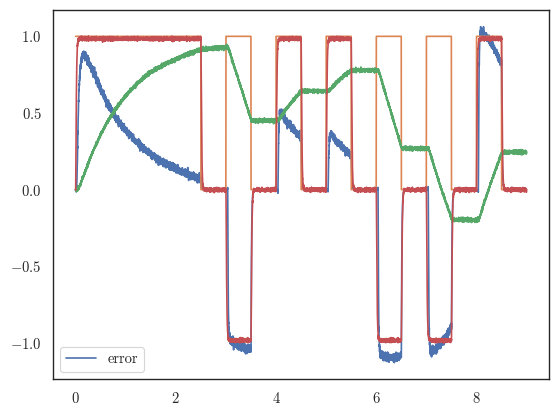

In [6]:
fig, ax = plt.subplots()
# ax.plot(sim.trange(), sim.data[net.probe_weight])
ax.plot(sim.trange(), sim.data[net.probe_error_value], label="error")
ax.plot(sim.trange(), sim.data[net.probe_target])
ax.plot(sim.trange(), sim.data[net.probe_value])
ax.plot(sim.trange(), sim.data[net.probe_stim])
plt.legend()
plt.show()

In [2]:
dataset = "jiang"
sid = 1
alpha = 1e-4
z = 1
lambd = 1
n_neurons = 500
iti = False
iti_noise = 0
empirical = pd.read_pickle(f"data/{dataset}.pkl").query("sid==@sid")
trials = empirical['trial'].unique() 
columns = ['type', 'sid', 'trial', 'stage', 'estimate']
dfs = []
W = np.zeros((1, n_neurons))
for trial in trials[:2]:
    print(f"training sid {sid}, trial {trial}")
    env = EnvironmentSyn(dataset, sid=sid, trial=trial, lambd=lambd, iti_noise=iti_noise)
    net, sim, W = simulate_NEF_syn(W, env, alpha=alpha, n_neurons=n_neurons, lambd=lambd, z=z, seed_net=sid, train=True)
for trial in trials[:2]:
    print(f"running sid {sid}, trial {trial}")
    env = EnvironmentSyn(dataset, sid=sid, trial=trial, lambd=lambd, iti_noise=iti_noise)
    net, sim = simulate_NEF_syn(W, env, alpha=alpha, n_neurons=n_neurons, lambd=lambd, z=z, seed_net=sid, train=False)

training sid 1, trial 1
training sid 1, trial 2
running sid 1, trial 1
running sid 1, trial 2


In [ ]:
fig, ax = plt.subplots()
# ax.plot(sim.trange(), sim.data[net.probe_weight])
ax.plot(sim.trange(), sim.data[net.probe_error_value])
ax.plot(sim.trange(), sim.data[net.probe_target])
ax.plot(sim.trange(), sim.data[net.probe_value])
ax.plot(sim.trange(), sim.data[net.probe_stim])
plt.show()

In [7]:
obs_times = np.arange(3, 3+3*env.n_neighbors+1, 1) * env.T/env.dt - env.T/env.dt/2
obs_times = obs_times.astype(int)

In [8]:
obs_times

array([2500, 3500, 4500, 5500, 6500, 7500, 8500])

In [13]:
sim.data[net.probe_error_value][obs_times[0]-11]

array([0.08178832])

In [23]:
np.mean(sim.data[net.probe_error1_spikes][obs_times[0]+12])

29.857887469734866

# Run and save activity data for many trials

In [2]:
# syn = activities_NEF_syn("jiang", sid=1, alpha=1e-4, z=0.5, lambd=1, n_neurons=500)
# syn.to_pickle("data/NEF_syn_compare_activities.pkl")

In [2]:
rec = activities_NEF_rec("jiang", sid=1, alpha=0.2, z=0.5, lambd=1, n_neurons=500)
rec.to_pickle("data/NEF_rec_compare_activities_lambd1.pkl")

training sid 1, trial 1
training sid 1, trial 2
training sid 1, trial 3
training sid 1, trial 4
training sid 1, trial 5
training sid 1, trial 6
training sid 1, trial 7
training sid 1, trial 8
training sid 1, trial 9
training sid 1, trial 10
training sid 1, trial 11
training sid 1, trial 12
training sid 1, trial 13
training sid 1, trial 14
training sid 1, trial 15
training sid 1, trial 16
training sid 1, trial 17
training sid 1, trial 18
training sid 1, trial 19
training sid 1, trial 20
running sid 1, trial 1
running sid 1, trial 2
running sid 1, trial 3
running sid 1, trial 4
running sid 1, trial 5
running sid 1, trial 6
running sid 1, trial 7
running sid 1, trial 8
running sid 1, trial 9
running sid 1, trial 10
running sid 1, trial 11
running sid 1, trial 12
running sid 1, trial 13
running sid 1, trial 14
running sid 1, trial 15
running sid 1, trial 16
running sid 1, trial 17
running sid 1, trial 18
running sid 1, trial 19
running sid 1, trial 20
running sid 1, trial 21
running sid 1,

In [7]:
dfs = []
for sid in [1,2,3,4,5]:
    dfs.append(activities_NEF_rec("jiang", sid=sid, alpha=0.1+0.01*sid, z=0.2+0.1*sid, lambd=0, n_neurons=500))
rec = pd.concat(dfs, ignore_index=True)
rec.to_pickle("data/NEF_rec_compare_activities_lambd0.pkl")

training sid 1, trial 1
training sid 1, trial 2
training sid 1, trial 3
training sid 1, trial 4
training sid 1, trial 5
training sid 1, trial 6
training sid 1, trial 7
training sid 1, trial 8
training sid 1, trial 9
training sid 1, trial 10
training sid 1, trial 11
training sid 1, trial 12
training sid 1, trial 13
training sid 1, trial 14
training sid 1, trial 15
training sid 1, trial 16
training sid 1, trial 17
training sid 1, trial 18
training sid 1, trial 19
training sid 1, trial 20
running sid 1, trial 1
running sid 1, trial 2
running sid 1, trial 3
running sid 1, trial 4
running sid 1, trial 5
running sid 1, trial 6
running sid 1, trial 7
running sid 1, trial 8
running sid 1, trial 9
running sid 1, trial 10
running sid 1, trial 11
running sid 1, trial 12
running sid 1, trial 13
running sid 1, trial 14
running sid 1, trial 15
running sid 1, trial 16
running sid 1, trial 17
running sid 1, trial 18
running sid 1, trial 19
running sid 1, trial 20
running sid 1, trial 21
running sid 1,

# Activity plots

In [13]:
# rec_lambd1 = pd.read_pickle("data/NEF_rec_compare_activities_lambd1.pkl")
# rec_lambd0 = pd.read_pickle("data/NEF_rec_compare_activities_lambd0.pkl")
syn_lambd0 = pd.read_pickle("data/NEF_syn_apr7lambda0_activities.pkl")
syn_lambd1 = pd.read_pickle("data/NEF_syn_apr8lambda1_activities.pkl")

In [14]:
def round_to_nearest(arr):
    return np.round(arr / 0.1) * 0.1
rounded_lambd0 = round_to_nearest(syn_lambd0['aPE'].to_numpy())
rounded_lambd1 = round_to_nearest(syn_lambd1['aPE'].to_numpy())
syn_lambd0['aPE_bin'] = rounded_lambd0
syn_lambd1['aPE_bin'] = rounded_lambd1

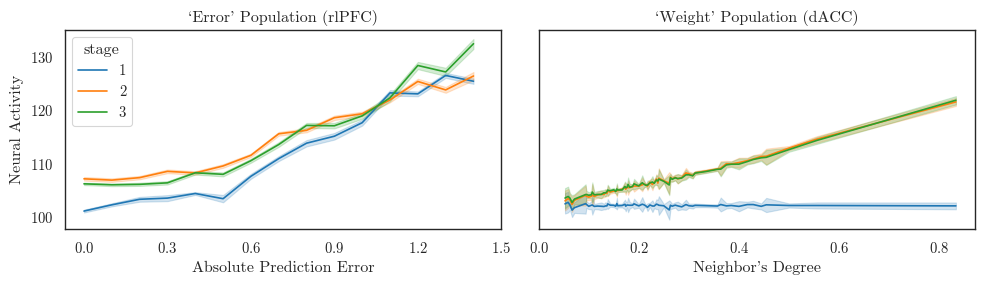

In [19]:
ape_bins = np.arange(0, 1, 0.1)
rd_bins = np.arange(0, 0.8, 0.1)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3), sharey=True, sharex=False)
sns.lineplot(syn_lambd0.query("stage>0 & population=='error1' & aPE_bin<1.5"), x='aPE_bin', y='activity', hue='stage', ax=axes[0], palette=palette[:3])
sns.lineplot(syn_lambd0.query("stage>0 & population=='weight'"), x='RD', y='activity', hue='stage', ax=axes[1], palette=palette[:3])
axes[0].set(title="`Error' Population (rlPFC)", ylabel="Neural Activity", xlabel="Absolute Prediction Error", xticks=np.arange(0, 1.8, 0.3))
axes[1].set(title="`Weight' Population (dACC)", ylabel=None, xticks=np.arange(0, 1.0, 0.2), xlabel="Neighbor's Degree")
axes[1].get_legend().remove()
plt.tight_layout()
fig.savefig("plots/activities_social.jpg", dpi=600)

In [15]:
# ape_bins = np.arange(0, 1, 0.1)
# rd_bins = np.arange(0, 1, 0.1)
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,5), sharey=None, sharex='col')
# sns.lineplot(syn_lambd0.query("stage>0 & population=='error1' & aPE_bin<1.5"), x='aPE_bin', y='activity', hue='stage', ax=axes[0][0], palette=palette[:3])
# sns.lineplot(syn_lambd0.query("stage>0 & population=='weight'"), x='RD', y='activity', hue='stage', ax=axes[0][1], palette=palette[:3])
# sns.lineplot(syn_lambd1.query("stage>0 & population=='error1' & aPE_bin<1.5"), x='aPE_bin', y='activity', hue='stage', ax=axes[1][0], palette=palette[:3])
# sns.lineplot(syn_lambd1.query("stage>0 & population=='weight'"), x='RD', y='activity', hue='stage', ax=axes[1][1], palette=palette[:3])
# axes[0][0].set(title="Error Population", ylabel="Neural Activity\n"+r"$\lambda=0$", xticks=np.arange(0, 1.8, 0.3))
# axes[0][1].set(title="Weight Population", ylabel=None, xticks=np.arange(0, 1.2, 0.2))
# axes[1][0].set(ylabel="Neural Activity\n"+r"$\lambda=1$", xlabel="Absolute Prediction Error")
# axes[1][1].set(ylabel=None, xlabel="Neighbor's Degree")
# axes[0][1].get_legend().remove()
# axes[1][0].get_legend().remove()
# axes[1][1].get_legend().remove()
# # plt.legend()
# plt.tight_layout()
# fig.savefig("plots/lambdas_activities.jpg", dpi=600)

In [3]:
# activity_data_rl = pd.read_pickle("data/NEF_RL_mar13_activities.pkl")
# activity_data_wm = pd.read_pickle("data/NEF_WM_mar13_activities.pkl")
# pe_bins = np.arange(0, 2, 0.2)
# rd_bins = np.arange(0, 1, 0.1)
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6), sharex='row', sharey='row')
# sns.regplot(data=activity_data_rl.query("stage==1 & population=='error1'").query("aPE<1.5"), x='aPE', y='activity', ax=axes[0][0], color=palette[0], x_bins=pe_bins, scatter_kws={'s': 5}, line_kws=dict(color=palette[1]))
# sns.regplot(data=activity_data_rl.query("stage==2 & population=='error1'").query("aPE<1.5"), x='aPE', y='activity', ax=axes[0][1], color=palette[0], x_bins=pe_bins, scatter_kws={'s': 5}, line_kws=dict(color=palette[1]))
# sns.regplot(data=activity_data_rl.query("stage==3 & population=='error1'").query("aPE<1.5"), x='aPE', y='activity', ax=axes[0][2], color=palette[0], x_bins=pe_bins, scatter_kws={'s': 5}, line_kws=dict(color=palette[1]))
# sns.regplot(data=activity_data_rl.query("stage==1 & population=='weight'"), x='RD', y='activity', ax=axes[1][0], color=palette[0], x_bins=rd_bins, scatter_kws={'s': 5}, line_kws=dict(color=palette[1]))
# sns.regplot(data=activity_data_rl.query("stage==2 & population=='weight'"), x='RD', y='activity', ax=axes[1][1], color=palette[0], x_bins=rd_bins, scatter_kws={'s': 5}, line_kws=dict(color=palette[1]))
# sns.regplot(data=activity_data_rl.query("stage==3 & population=='weight'"), x='RD', y='activity', ax=axes[1][2], color=palette[0], x_bins=rd_bins, scatter_kws={'s': 5}, line_kws=dict(color=palette[1]))
# axes[0][0].set(title='Stage 1', xlabel='abs(PE)', ylabel='Mean Activity of\nError Neurons')
# axes[0][1].set(title='Stage 2', xlabel='abs(PE)', ylabel=None)
# axes[0][2].set(title='Stage 3', xlabel='abs(PE)', ylabel=None)
# axes[1][0].set(xlabel='RD', ylabel='Mean Activity of\nWeight Neurons')
# axes[1][1].set(xlabel='RD', ylabel=None)
# axes[1][2].set(xlabel='RD', ylabel=None)
# plt.tight_layout()
# plt.show()
# fig.savefig("plots/NEF_RL_activities.jpg", dpi=600)

In [13]:
syn_lambd0

,type,trial,stage,population,neuron,aPE,RD,lambd,activity,sid
0,NEF_syn,1,0,weight,1,0.095088,0.00000,0.0,248.8676,1
1,NEF_syn,1,0,weight,2,0.095088,0.00000,0.0,224.0270,1
2,NEF_syn,1,0,weight,3,0.095088,0.00000,0.0,0.0000,1
3,NEF_syn,1,0,weight,4,0.095088,0.00000,0.0,0.0000,1
4,NEF_syn,1,0,weight,5,0.095088,0.00000,0.0,231.0850,1
...,...,...,...,...,...,...,...,...,...,...
86784995,NEF_syn,40,3,error2,246,0.307595,0.33333,0.0,291.2743,224
86784996,NEF_syn,40,3,error2,247,0.307595,0.33333,0.0,176.3683,224
86784997,NEF_syn,40,3,error2,248,0.307595,0.33333,0.0,0.0000,224
86784998,NEF_syn,40,3,error2,249,0.307595,0.33333,0.0,241.4436,224
